# Analyse des Sentiments der Nachrichtenartikeln 

In [2]:
#Import Bibliothek
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

C:\Users\MarkE\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Abruf Daten 
file_path = r'4_Daten_bereinigt.csv'
df = pd.read_csv(file_path)

#Datum in das Format Jahr.Monat umwandeln
df['Jahr.Monat'] = pd.to_datetime(df['Datum']).dt.to_period('M')

#Kategorisierung nach Zeitraum
def categorize_period(date):
    if date <= pd.Period('2022-11', 'M'):
        return '0. vor ChatGPT'
    elif pd.Period('2022-12', 'M') <= date <= pd.Period('2023-11', 'M'):
        return '1. ChatGPT-Jahr'
    elif pd.Period('2023-12', 'M') <= date <= pd.Period('2024-11', 'M'):
        return '2. ChatGPT-Jahr'
    return 'Andere'

df['Zeitraum'] = df['Jahr.Monat'].apply(categorize_period)


print(df.head())

  Quelle       Datum                                               Link  \
0    FAZ  11/30/2023  https://www.faz.net/aktuell/wirtschaft/unterne...   
1    FAZ  11/30/2023  https://www.faz.net/aktuell/wirtschaft/kuenstl...   
2    FAZ  11/29/2023  https://www.faz.net/aktuell/feuilleton/medien/...   
3    FAZ  11/28/2023  https://www.faz.net/pro/d-economy/kuenstliche-...   
4    FAZ  11/28/2023  https://www.faz.net/pro/d-economy/prompt-der-w...   

                                               Titel  \
0  KI: Warum wir nicht mit Roboter-Autos vollauto...   
1  Microsoft: Sind Jahrzehnte von einer künstlich...   
2  Künstliche Intelligenz: Europa muss von neuen ...   
3  Was die Superintelligenz-KI anrichten könnte, ...   
4  Künstliche Intelligenz: Wie man sich seine Pro...   

                                                Text  Anzahl Woerter Text  \
0  Roboterautos faszinieren viele – die Augen der...                 1963   
1  Der Krieg von Mensch gegen Maschine verschiebt...      

In [13]:
#Sentimentanalyse der Artikelinhalte mit Textblob
def analyse_sentiment(text):
    #Stimmungsanalyse für den Text durch
    try:
        if text:  #Sicherstellen, dass der Text nicht None ist
            blob = TextBlob(text)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        else:
            return None, None  #None-Werte zurückgeben, falls kein Text vorhanden ist
    except Exception as e:
        print(f"Fehler bei der Stimmungsanalyse: {e}")
        return None, None

#Stimmungsanalyse auf den gesamten DataFrame anwenden
df[['Polaritaet Textblob [Text]', 'Subjektivitaet Textblob [Text]']] = df['Text_bereinigt'].apply(
    lambda text: pd.Series(analyse_sentiment(text)) if text else pd.Series([None, None])
)

#Berechne den Durchschnitt der Sentiment Analyse
durchschnitt_polaritaet = round(df['Polaritaet Textblob [Text]'].mean(), 3)
durchschnitt_subjektivitaet = round(df['Subjektivitaet Textblob [Text]'].mean(), 3)

print("Durchschnitt der Polaritaet:", durchschnitt_polaritaet)
print("Durchschnitt der Subjektivitaet:", durchschnitt_subjektivitaet)

#Anzeige des aktualisierten DataFrame, um Änderungen anzuzeigen
print(df[['Text_bereinigt', 'Polaritaet Textblob [Text]', 'Subjektivitaet Textblob [Text]']])

Durchschnitt der Polaritaet: 0.045
Durchschnitt der Subjektivitaet: 0.464
                                         Text_bereinigt  \
0     many fascinating robot car eye world rightly a...   
1     war person machine shift accord Microsoft unli...   
2     strike Hollywood boss creative United States a...   
3     chatgpt fun get serious expert expect superint...   
4     often recur instruction artificial intelligenc...   
...                                                 ...   
2044  race artificial intelligence Google want take ...   
2045  Minister Transport also digital minister talk ...   
2046  since attack Hamas Israel israeli army Israel ...   
2047  Tina Kretschmer professor educational sciences...   
2048  Hamburg new police chief Falk Schnabel also re...   

      Polaritaet Textblob [Text]  Subjektivitaet Textblob [Text]  
0                       0.044258                        0.416579  
1                      -0.119641                        0.476712  
2               

In [12]:
#Sentimentanalyse der Ueberschriften mit Textblob
def analyse_sentiment(text):
    #Stimmungsanalyse für den Text 
    try:
        if text is not None:  #Sicherstellen, dass der Text nicht None ist
            text_str = str(text)  #Konvertiere den Text zu einem String, wenn notwendig
            blob = TextBlob(text_str)
            return blob.sentiment.polarity, blob.sentiment.subjectivity
        else:
            return None, None  #None-Werte zurückgeben, falls kein Text vorhanden ist
    except Exception as e:
        print(f"Fehler bei der Stimmungsanalyse: {e}")
        return None, None

#Stimmungsanalyse auf den gesamten DataFrame anwenden
df[['Polaritaet Textblob [Titel]', 'Subjektivitaet Textblob [Titel]']] = df['Titel_bereinigt'].apply(
    lambda text: pd.Series(analyse_sentiment(text)) if text else pd.Series([None, None])
)

#Berechne den Durchschnitt der Sentiment Analyse
durchschnitt_polaritaet = round(df['Polaritaet Textblob [Titel]'].mean(),3)
durchschnitt_subjektivitaet = round(df['Subjektivitaet Textblob [Titel]'].mean(), 3)

print("Durchschnitt der Polaritaet:", durchschnitt_polaritaet)
print("Durchschnitt der Subjektivitaet:", durchschnitt_subjektivitaet)

#Anzeige des aktualisierten DataFrame, um Änderungen anzuzeigen
print(df[['Text_bereinigt','Polaritaet Textblob [Titel]', 'Subjektivitaet Textblob [Titel]', 'Polaritaet Textblob [Text]', 'Subjektivitaet Textblob [Text]']])

Durchschnitt der Polaritaet: -0.062
Durchschnitt der Subjektivitaet: 0.284
                                         Text_bereinigt  \
0     many fascinating robot car eye world rightly a...   
1     war person machine shift accord Microsoft unli...   
2     strike Hollywood boss creative United States a...   
3     chatgpt fun get serious expert expect superint...   
4     often recur instruction artificial intelligenc...   
...                                                 ...   
2044  race artificial intelligence Google want take ...   
2045  Minister Transport also digital minister talk ...   
2046  since attack Hamas Israel israeli army Israel ...   
2047  Tina Kretschmer professor educational sciences...   
2048  Hamburg new police chief Falk Schnabel also re...   

      Polaritaet Textblob [Titel]  Subjektivitaet Textblob [Titel]  \
0                        0.000000                         0.000000   
1                       -0.600000                         1.000000   
2     

In [6]:
#Speichern des geänderten DataFrame in einer neuen CSV-Datei
df.to_csv('2_Daten_nach_Sentiment.csv', index=False)

In [7]:
#Sentiment vor ChatGPT und nach ChatGPT
#Gruppieren nach 'Zeitraum' und Berechnen der erforderlichen Statistiken
result = df.groupby('Zeitraum').agg(
    Anzahl_Artikel=('Quelle', 'size'),  # Zählen der Datensätze
    Polaritaet_text=('Polaritaet Textblob [Text]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_text=('Subjektivitaet Textblob [Text]', 'mean'),  # Durchschnitt der "Subjektivitaet"
    Polaritaet_titel=('Polaritaet Textblob [Titel]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_titel=('Subjektivitaet Textblob [Titel]', 'mean')  # Durchschnitt der "Subjektivitaet"
).reset_index()

#Runden der Ergebnisse auf drei Dezimalstellen
result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']] = result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']].round(3)

print("Zusammenfassung der Daten nach Zeitraum:")
print(result)

Zusammenfassung der Daten nach Zeitraum:
          Zeitraum  Anzahl_Artikel  Polaritaet_text  Subjektivitaet_text  \
0   0. vor ChatGPT             155            0.057                0.469   
1  1. ChatGPT-Jahr            1178            0.041                0.469   
2  2. ChatGPT-Jahr             716            0.049                0.456   

   Polaritaet_titel  Subjektivitaet_titel  
0            -0.083                 0.314  
1            -0.065                 0.271  
2            -0.051                 0.300  


Zusammenfassung der Daten nach Zeitraum:
   Jahr.Monat  Anzahl_Artikel  Polaritaet_text  Subjektivitaet_text  \
0     2021-12              19            0.070                0.466   
1     2022-01              16            0.038                0.468   
2     2022-02               6            0.050                0.430   
3     2022-03              10            0.055                0.481   
4     2022-04               9            0.074                0.470   
5     2022-05              11            0.040                0.442   
6     2022-06              12            0.054                0.508   
7     2022-07              16            0.047                0.474   
8     2022-08               7            0.064                0.465   
9     2022-09              12            0.016                0.448   
10    2022-10              23            0.065                0.469   
11    2022-11              14            0.099                0.489   
12    2022-12              25       

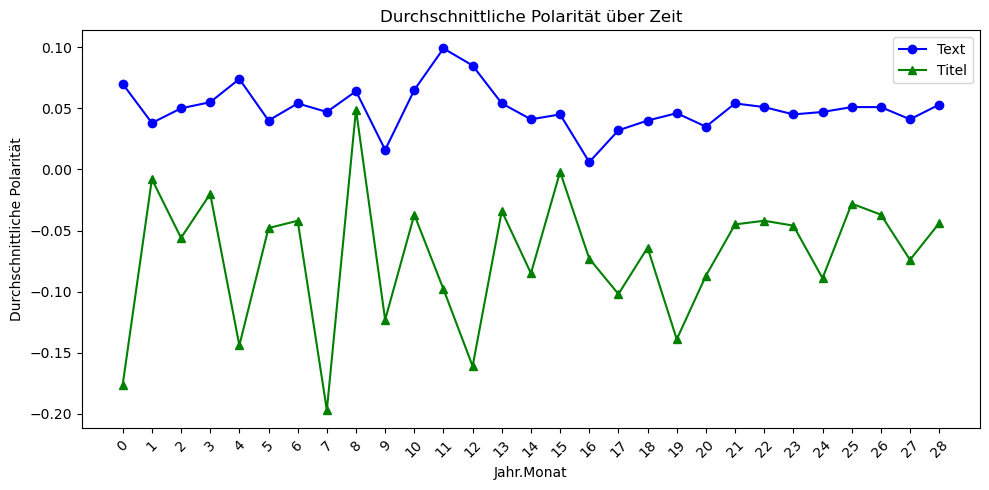

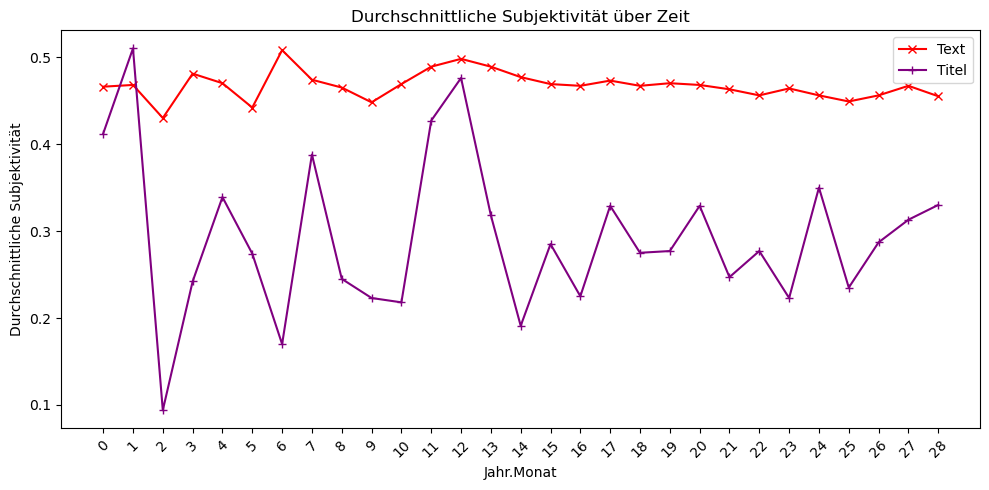

In [8]:
#Sentiment nach Monaten
#Gruppieren nach 'Jahr.Monat' und Berechnen der erforderlichen Statistiken
result = df.groupby('Jahr.Monat').agg(
    Anzahl_Artikel=('Quelle', 'size'),  # Zählen der Datensätze
    Polaritaet_text=('Polaritaet Textblob [Text]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_text=('Subjektivitaet Textblob [Text]', 'mean'),  # Durchschnitt der "Subjektivitaet"
    Polaritaet_titel=('Polaritaet Textblob [Titel]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_titel=('Subjektivitaet Textblob [Titel]', 'mean')  # Durchschnitt der "Subjektivitaet"
).reset_index()

#Runden der Ergebnisse auf drei Dezimalstellen
result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']] = result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']].round(3)

print("Zusammenfassung der Daten nach Zeitraum:")
print(result)

#Konvertiere den Index in Strings
result.index = result.index.astype(str)

#Erstelle das erste Liniendiagramm für die Polaritätswerte
plt.figure(figsize=(10, 5))
plt.plot(result.index, result['Polaritaet_text'], label='Text', marker='o', color='blue')
plt.plot(result.index, result['Polaritaet_titel'], label='Titel', marker='^', color='green')
plt.title('Durchschnittliche Polarität über Zeit')
plt.xlabel('Jahr.Monat')
plt.ylabel('Durchschnittliche Polarität')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#Erstelle das zweite Liniendiagramm für die Subjektivitätswerte
plt.figure(figsize=(10, 5))
plt.plot(result.index, result['Subjektivitaet_text'], label='Text', marker='x', color='red')
plt.plot(result.index, result['Subjektivitaet_titel'], label='Titel', marker='+', color='purple')
plt.title('Durchschnittliche Subjektivität über Zeit')
plt.xlabel('Jahr.Monat')
plt.ylabel('Durchschnittliche Subjektivität')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#Sentiment je Nachrichtenportal
#Gruppieren nach 'Quelle' und Berechnen der erforderlichen Statistiken
result = df.groupby(['Quelle']).agg(
    Number_of_Records=('Quelle', 'size'),  # Zählen der Datensätze
    Polaritaet_text=('Polaritaet Textblob [Text]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_text=('Subjektivitaet Textblob [Text]', 'mean'),  # Durchschnitt der "Subjektivitaet"
    Polaritaet_titel=('Polaritaet Textblob [Titel]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_titel=('Subjektivitaet Textblob [Titel]', 'mean')  # Durchschnitt der "Subjektivitaet"
).reset_index()

#Runden der Ergebnisse auf drei Dezimalstellen
result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']] = result[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']].round(3)

#Ergebnis nach 'Polaritaet_text' sortieren
result_sorted = result.sort_values(by='Polaritaet_text', ascending=False)

#Ausgabe des sortierten und gerundeten Ergebnisses
print(result_sorted)


         Quelle  Number_of_Records  Polaritaet_text  Subjektivitaet_text  \
6        Watson                 58            0.065                0.474   
1         Focus                192            0.055                0.456   
0           FAZ                590            0.052                0.462   
4  Sueddeutsche                235            0.045                0.474   
7          Zeit                326            0.043                0.469   
2           RND                263            0.041                0.461   
5  Tagesspiegel                135            0.033                0.463   
3       Spiegel                250            0.032                0.464   

   Polaritaet_titel  Subjektivitaet_titel  
6            -0.031                 0.326  
1             0.004                 0.233  
0            -0.056                 0.297  
4            -0.060                 0.244  
7            -0.109                 0.318  
2            -0.040                 0.295  
5      

In [10]:
#Sentiment je Nachrichtenportal vor ChatGPT und nach ChatGPT

#Gruppiere zuerst nach 'Quelle' und dann nach 'Jahr.Monat'
grouped = df.groupby(['Quelle', 'Zeitraum']).agg(
    Anzahl_Artikel=('Quelle', 'size'),  # Zählen der Datensätze
    Polaritaet_text=('Polaritaet Textblob [Text]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_text=('Subjektivitaet Textblob [Text]', 'mean'),  # Durchschnitt der "Subjektivitaet"
    Polaritaet_titel=('Polaritaet Textblob [Titel]', 'mean'),  # Durchschnitt der "Polaritaet"
    Subjektivitaet_titel=('Subjektivitaet Textblob [Titel]', 'mean')  # Durchschnitt der "Subjektivitaet"
).reset_index()

#Runde alle numerischen Werte auf drei Dezimalstellen
grouped[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']] = grouped[['Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']].round(3)

#Durchlaufe alle eindeutigen Quellen
for quelle in grouped['Quelle'].unique():
    source_data = grouped[grouped['Quelle'] == quelle]
    source_data.set_index('Zeitraum', inplace=True)

    print(f"Tabelle für Quelle: {quelle}")
    print(source_data[['Anzahl_Artikel', 'Polaritaet_text', 'Subjektivitaet_text', 'Polaritaet_titel', 'Subjektivitaet_titel']])

Tabelle für Quelle: FAZ
                 Anzahl_Artikel  Polaritaet_text  Subjektivitaet_text  \
Zeitraum                                                                
0. vor ChatGPT               29            0.065                0.473   
1. ChatGPT-Jahr             313            0.048                0.467   
2. ChatGPT-Jahr             248            0.056                0.454   

                 Polaritaet_titel  Subjektivitaet_titel  
Zeitraum                                                 
0. vor ChatGPT             -0.172                 0.445  
1. ChatGPT-Jahr            -0.050                 0.290  
2. ChatGPT-Jahr            -0.051                 0.288  
Tabelle für Quelle: Focus
                 Anzahl_Artikel  Polaritaet_text  Subjektivitaet_text  \
Zeitraum                                                                
0. vor ChatGPT               13            0.066                0.428   
1. ChatGPT-Jahr              89            0.058                0.469   
2.